In [1]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

from src.testers import ScalarPolarTester, ScalarCartesianTester, ScalarPupilCase
from src.testers import polar_gaussian, polar_step, polar_exp, polar_logstep, polar_rsq

%load_ext autoreload
%autoreload 2

# Test cases (I): aberrated pupil

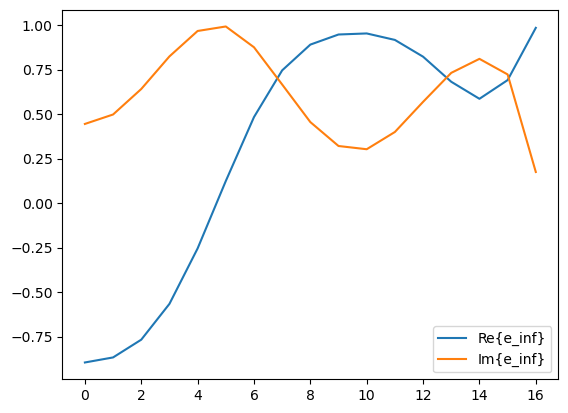

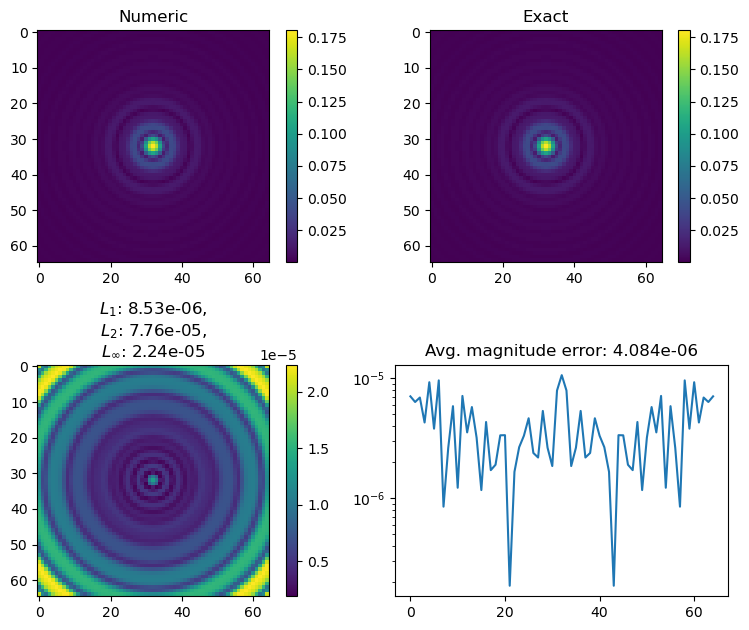

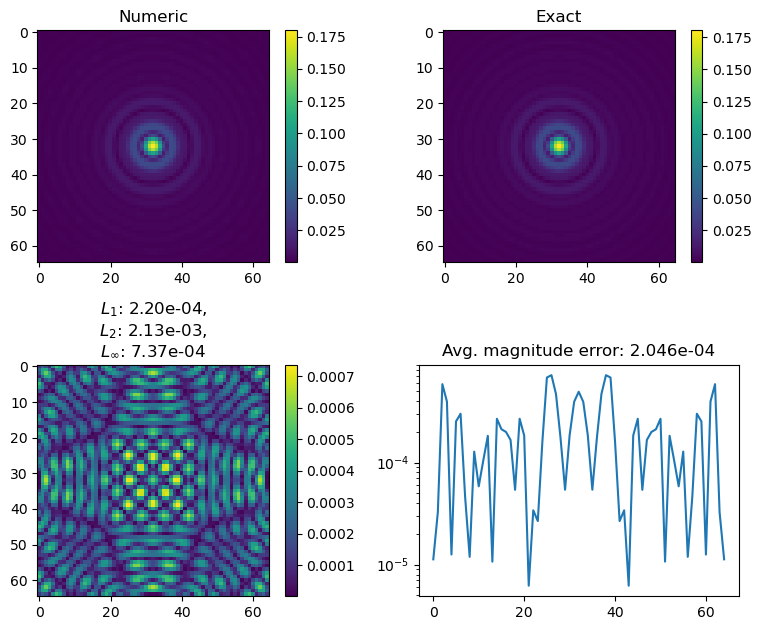

In [88]:
from src.pupil import ScalarPolarPupil
from src.test_pupils import get_polar_ck

import numpy as np
np.random.seed(6)
ck = get_polar_ck(4)

pupil = ScalarPolarPupil(
    n_pix_pupil=16+1,
    zernike_coefficients=ck,
)

plt.figure()
plt.plot(pupil.field.real.squeeze(), label="Re{e_inf}")
plt.plot(pupil.field.imag.squeeze(), label="Im{e_inf}")
plt.legend()

pupil_tc = ScalarPupilCase(pupil.zernike_coefficients, 0.6)
Ep_ref, Ep_num = ScalarPolarTester.eval_error(33, pupil_tc, plot=True)[1:]
Ec_ref, Ec_num = ScalarCartesianTester.eval_error(33, pupil_tc, plot=True)[1:]

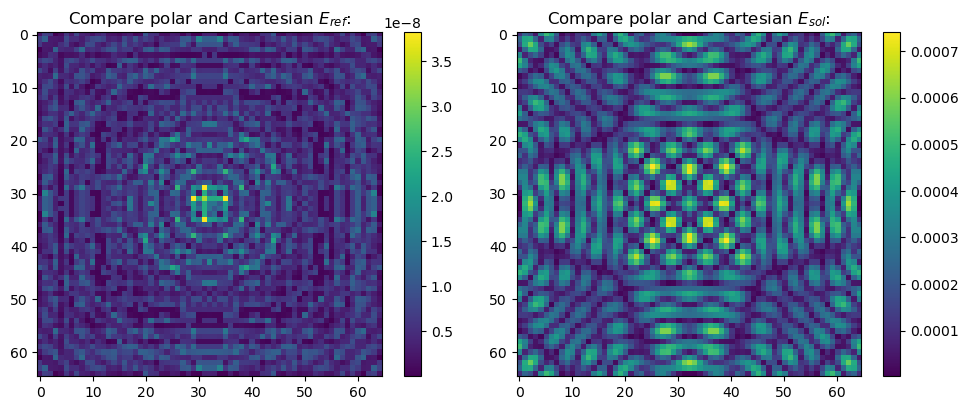

In [89]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

tensor([  3,   5,   9,  17,  33,  65, 129])


  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [04:37<00:00, 39.62s/it]


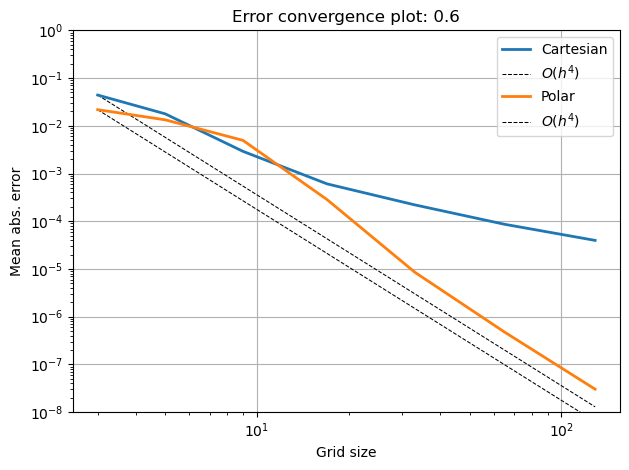

In [90]:
Ns = 2 ** (torch.arange(8)[1:]) + 1
print(Ns)

ScalarCartesianTester.plot_convergence(pupil_tc, Ns=Ns)
ScalarPolarTester.plot_convergence(pupil_tc, Ns=Ns)

# Test cases (II): analytic pupil functions
Compare Cartesian solution against its computed reference:

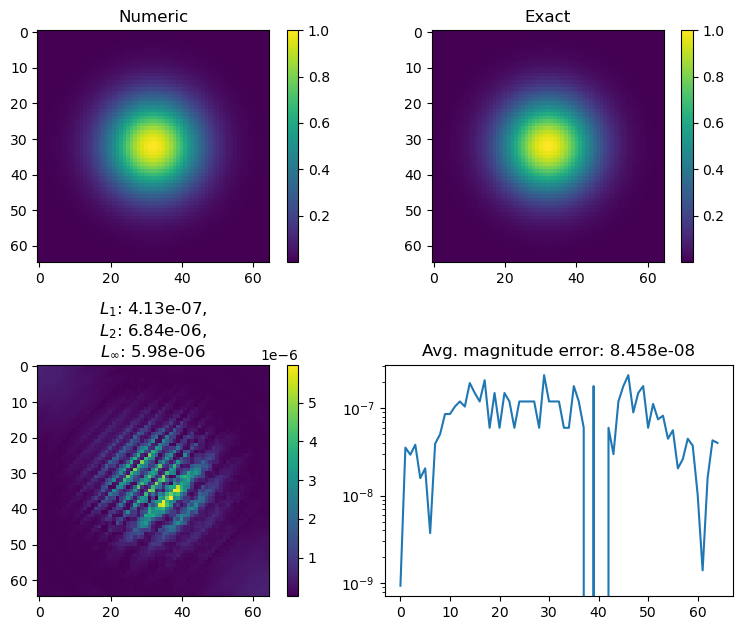

In [6]:
N = 32+1

Ec_ref, Ec_num = ScalarCartesianTester.eval_error(N, polar_rsq, plot=True)[1:]

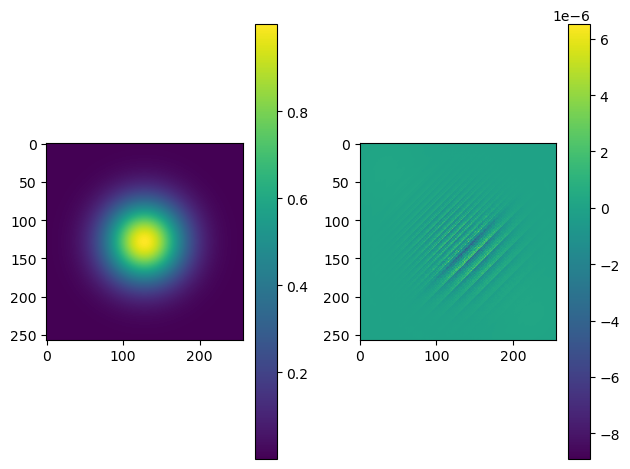

In [56]:
plt.subplot(121)
plt.imshow(Ec_num.real)
plt.colorbar()
plt.subplot(122)
plt.imshow(Ec_num.imag)
plt.colorbar()
plt.tight_layout()

Compare polar solution against its computed reference:

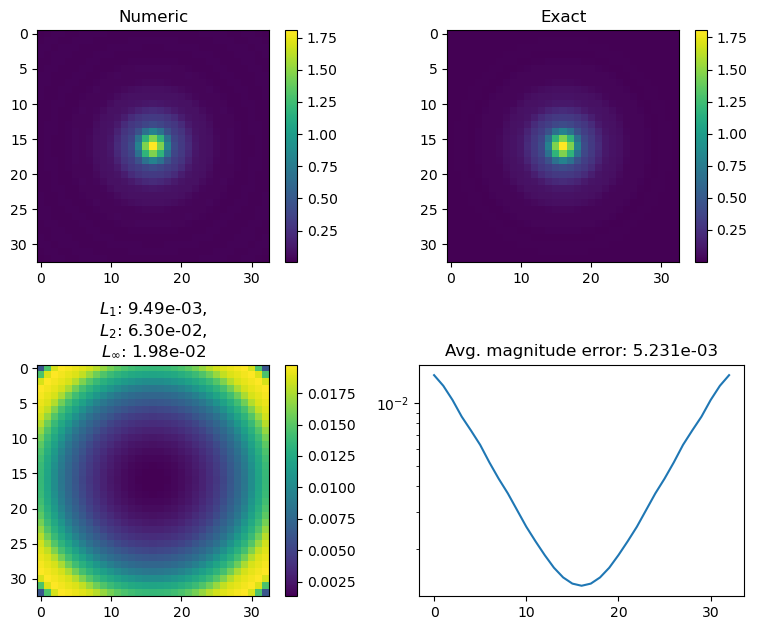

In [11]:
Ep_ref, Ep_num = ScalarPolarTester.eval_error(N, polar_rsq, plot=True)[1:]

Compare polar and Cartesian solutions directly:

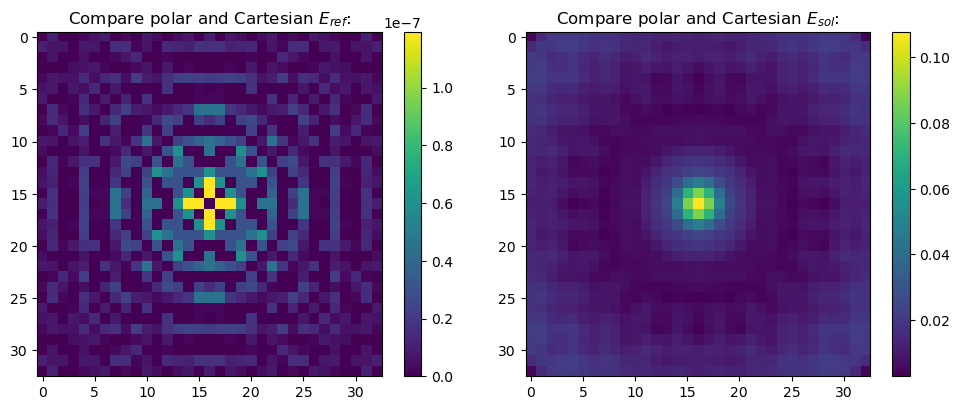

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

Convergence plots for various test functions:

100%|██████████| 19/19 [00:00<00:00, 97.03it/s] 


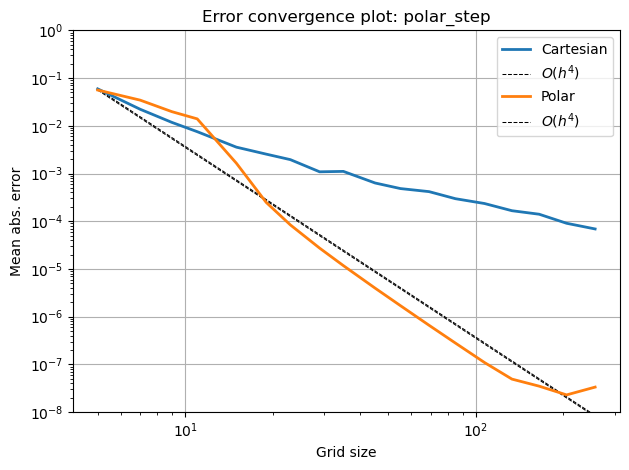

In [60]:
ScalarCartesianTester.plot_convergence(polar_step)
ScalarPolarTester    .plot_convergence(polar_step)

100%|██████████| 19/19 [00:54<00:00,  2.85s/it]


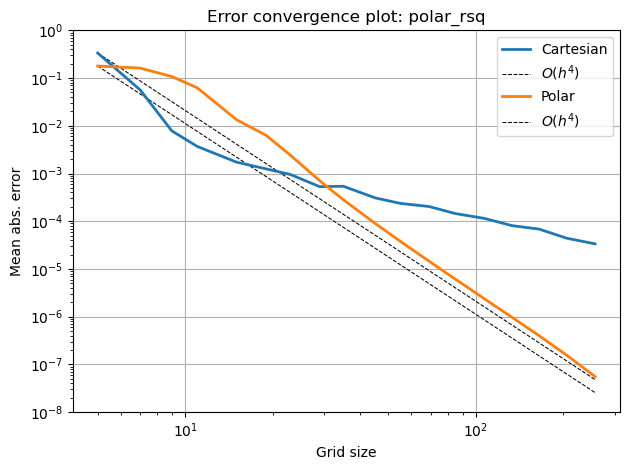

In [65]:
ScalarCartesianTester.plot_convergence(polar_rsq)
ScalarPolarTester    .plot_convergence(polar_rsq)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:45<00:00,  2.42s/it]


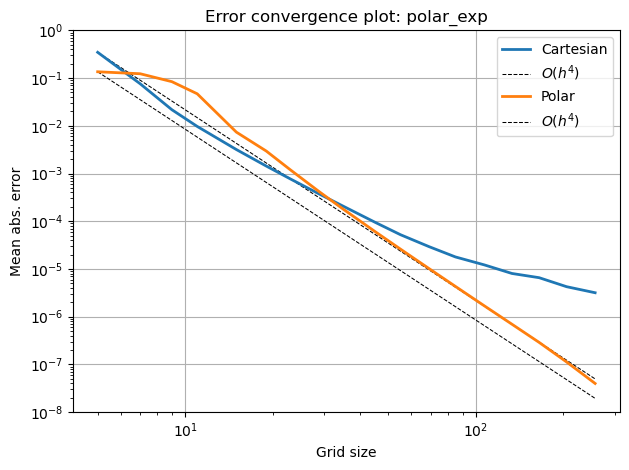

In [64]:
ScalarCartesianTester.plot_convergence(polar_exp)
ScalarPolarTester    .plot_convergence(polar_exp)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 104.58it/s]


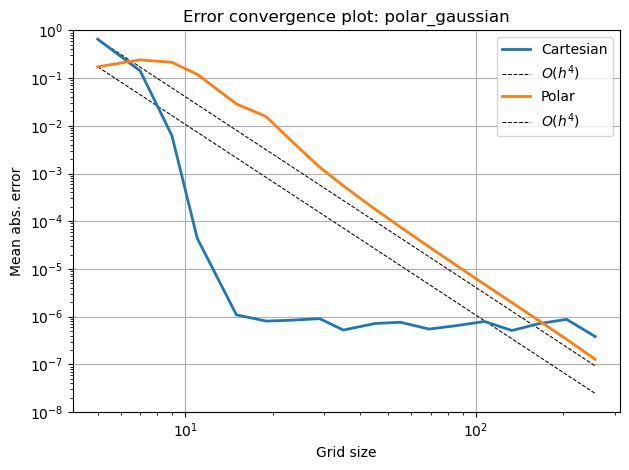

In [7]:
ScalarCartesianTester.plot_convergence(polar_gaussian)
ScalarPolarTester    .plot_convergence(polar_gaussian)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:00<00:00, 101.18it/s]


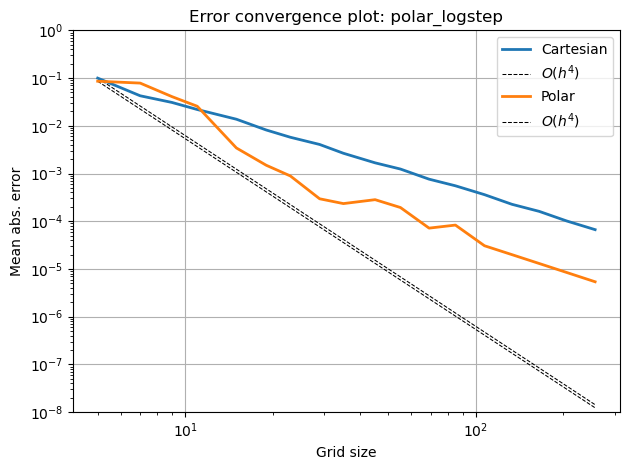

In [63]:
ScalarCartesianTester.plot_convergence(polar_logstep)
ScalarPolarTester    .plot_convergence(polar_logstep)